In [6]:
# Change this to any valid gameId in the source data
GAME_ID = "0022300869"

# Each source file has a dedicated processor class, use these to load and process src data
event_df = EventProcessor.load_games()
tracking_df = TrackingProcessor.load_games()
possession_df = PossessionProcessor.load_games()

# First, we need to extract all the shot events, link the corresponding rebound event, and associate with coordinate data
shot_rebound_df = ActionProcessor.extract_shots_and_rebounds(event_df, tracking_df)

# Now that we have the shot/rebounds collected, we can use our FeatureUtil to engineer the regions, shots are classified by which polygon contains them
shot_rebound_classified_df = FeatureUtil.classify_shot_locations(shot_rebound_df, possession_df, FeatureUtil.classify_shot_region)

hexbin_region_data_df = StatsUtil.generate_region_hexbin_data(shot_rebound_classified_df, ShotRegionUtil.regions)
shot_rebound_df

,gameId,eventType,playerId,playerName,teamId,teamAbbr,period,shot_time,wcTimeEnd,gcTime,...,defenderName,shot_x,shot_y,rebound_teamId,rebounder_id,rebound_time,dReb,playerId_shot,rebound_x,rebound_y
0,0022300451,SHOT,1626157,Karl-Anthony Towns,1610612750,MIN,1,1704139876720,NaN,703.87,...,Julius Randle,41.17,-3.66,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
1,0022300451,SHOT,203944,Julius Randle,1610612752,NYK,1,1704139897920,NaN,682.67,...,Mike Conley,-43.75,-22.32,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
2,0022300451,SHOT,1626157,Karl-Anthony Towns,1610612750,MIN,1,1704139914120,NaN,666.47,...,Julius Randle,32.53,-0.17,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
3,0022300451,SHOT,1630183,Jaden McDaniels,1610612750,MIN,1,1704140005240,NaN,603.05,...,Isaiah Hartenstein,40.48,22.86,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
4,0022300451,SHOT,1628384,OG Anunoby,1610612752,NYK,1,1704140025120,NaN,583.17,...,Anthony Edwards,-38.52,22.25,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,0022300869,SHOT,NaN,Rui Hachimura,1610612747,LAL,4,1709437076600,NaN,171.85,...,Michael Porter Jr.,27.81,8.54,1610612743,1627750,1.709437e+12,True,1629060,43.08,-4.55
1873,0022300869,SHOT,NaN,Anthony Davis,1610612747,LAL,4,1709437113480,NaN,134.97,...,Nikola Jokic,38.79,1.42,1610612743,203999,1.709437e+12,True,203076,40.65,-0.27
1874,0022300869,SHOT,NaN,LeBron James,1610612747,LAL,4,1709437277120,NaN,89.90,...,Aaron Gordon,25.59,19.71,1610612743,1629008,1.709437e+12,True,2544,41.40,-3.46
1875,0022300869,SHOT,NaN,Jamal Murray,1610612743,DEN,4,1709437298400,NaN,68.62,...,Anthony Davis,-19.06,-7.94,1610612743,203932,1.709437e+12,False,1627750,-43.92,-9.70


In [7]:
# First assign the chances to misses

shot_data_with_chances = StatsUtil.assign_player_rebound_chances_to_shots(
    shot_rebound_classified_df,
    tracking_df, 
    hexbin_region_data_df
)
shot_data_with_chances


100%|██████████| 836/836 [38:11<00:00,  2.74s/it]  


,gameId,eventType,playerId,playerName,teamId,teamAbbr,period,shot_time,wcTimeEnd,gcTime,...,rebound_teamId,rebounder_id,rebound_time,dReb,playerId_shot,rebound_x,rebound_y,basketX,shot_classification,player_rebound_chances
0,0022300451,SHOT,1626157,Karl-Anthony Towns,1610612750,MIN,1,1704139876720,NaN,703.87,...,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,41.75,CLOSE_RANGE,None
1,0022300451,SHOT,203944,Julius Randle,1610612752,NYK,1,1704139897920,NaN,682.67,...,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,-41.75,RIGHT_CORNER_THREE,None
2,0022300451,SHOT,1626157,Karl-Anthony Towns,1610612750,MIN,1,1704139914120,NaN,666.47,...,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,41.75,RIGHT_BASELINE_MID,None
3,0022300451,SHOT,1630183,Jaden McDaniels,1610612750,MIN,1,1704140005240,NaN,603.05,...,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,41.75,LEFT_CORNER_THREE,None
4,0022300451,SHOT,1628384,OG Anunoby,1610612752,NYK,1,1704140025120,NaN,583.17,...,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,-41.75,LEFT_CORNER_THREE,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,0022300869,SHOT,NaN,Rui Hachimura,1610612747,LAL,4,1709437076600,NaN,171.85,...,1610612743,1627750,1.709437e+12,True,1629060,43.08,-4.55,41.75,LEFT_BASELINE_MID,"{'1629008': 3.2418952618453867, '203999': 41.3..."
1873,0022300869,SHOT,NaN,Anthony Davis,1610612747,LAL,4,1709437113480,NaN,134.97,...,1610612743,203999,1.709437e+12,True,203076,40.65,-0.27,41.75,CLOSE_RANGE,"{'1629008': 9.523809523809524, '203999': 7.769..."
1874,0022300869,SHOT,NaN,LeBron James,1610612747,LAL,4,1709437277120,NaN,89.90,...,1610612743,1629008,1.709437e+12,True,2544,41.40,-3.46,41.75,LEFT_WING_THREE,"{'1629008': 55.88972431077694, '203932': 1.253..."
1875,0022300869,SHOT,NaN,Jamal Murray,1610612743,DEN,4,1709437298400,NaN,68.62,...,1610612743,203932,1.709437e+12,False,1627750,-43.92,-9.70,-41.75,CENTER_THREE,"{'1629008': 0.24937655860349126, '203932': 3.4..."


In [8]:
# Then calculate player statistics
player_rebound_stats = FeatureUtil.calculate_player_rebound_statistics(shot_data_with_chances)
player_rebound_stats

,player_id,total_opportunities,expected_rebounds,actual_rebounds,expected_reb_percentage,actual_reb_percentage,rebounds_above_expected
0,1626156,49,4.154468,3,0.084785,0.061224,-0.023561
1,1626157,57,5.408393,4,0.094884,0.070175,-0.024709
2,1626164,66,3.672272,4,0.055640,0.060606,0.004966
3,1626167,51,9.602965,11,0.188293,0.215686,0.027393
4,1626179,52,3.259979,2,0.062692,0.038462,-0.024230
...,...,...,...,...,...,...,...
182,203994,57,11.531706,13,0.202311,0.228070,0.025760
183,203999,61,13.063898,10,0.214162,0.163934,-0.050228
184,204060,14,1.308767,1,0.093483,0.071429,-0.022055
185,204456,25,1.221232,5,0.048849,0.200000,0.151151


In [26]:
import pandas as pd
player_data = pd.read_csv("./data/src/basic_player_info.csv", header=0)
print(player_data.dtypes)
player_rebound_stats['player_id'] = player_rebound_stats['player_id'].astype(int)
player_rebound_stats = pd.merge(player_rebound_stats, player_data[["person_id", "first_name", "last_name", "position"]], left_on="player_id", right_on="person_id", how="left")
player_rebound_stats = player_rebound_stats.drop(columns=["person_id"], axis=1)
player_rebound_stats.to_csv("rebound_percentage_above_expected_stats.csv")

first_name     object
nickname       object
last_name      object
person_id       int64
season          int64
jersey_num    float64
position       object
height         object
weight          int64
dtype: object


NameError: name 'player_rebound_stats' is not defined

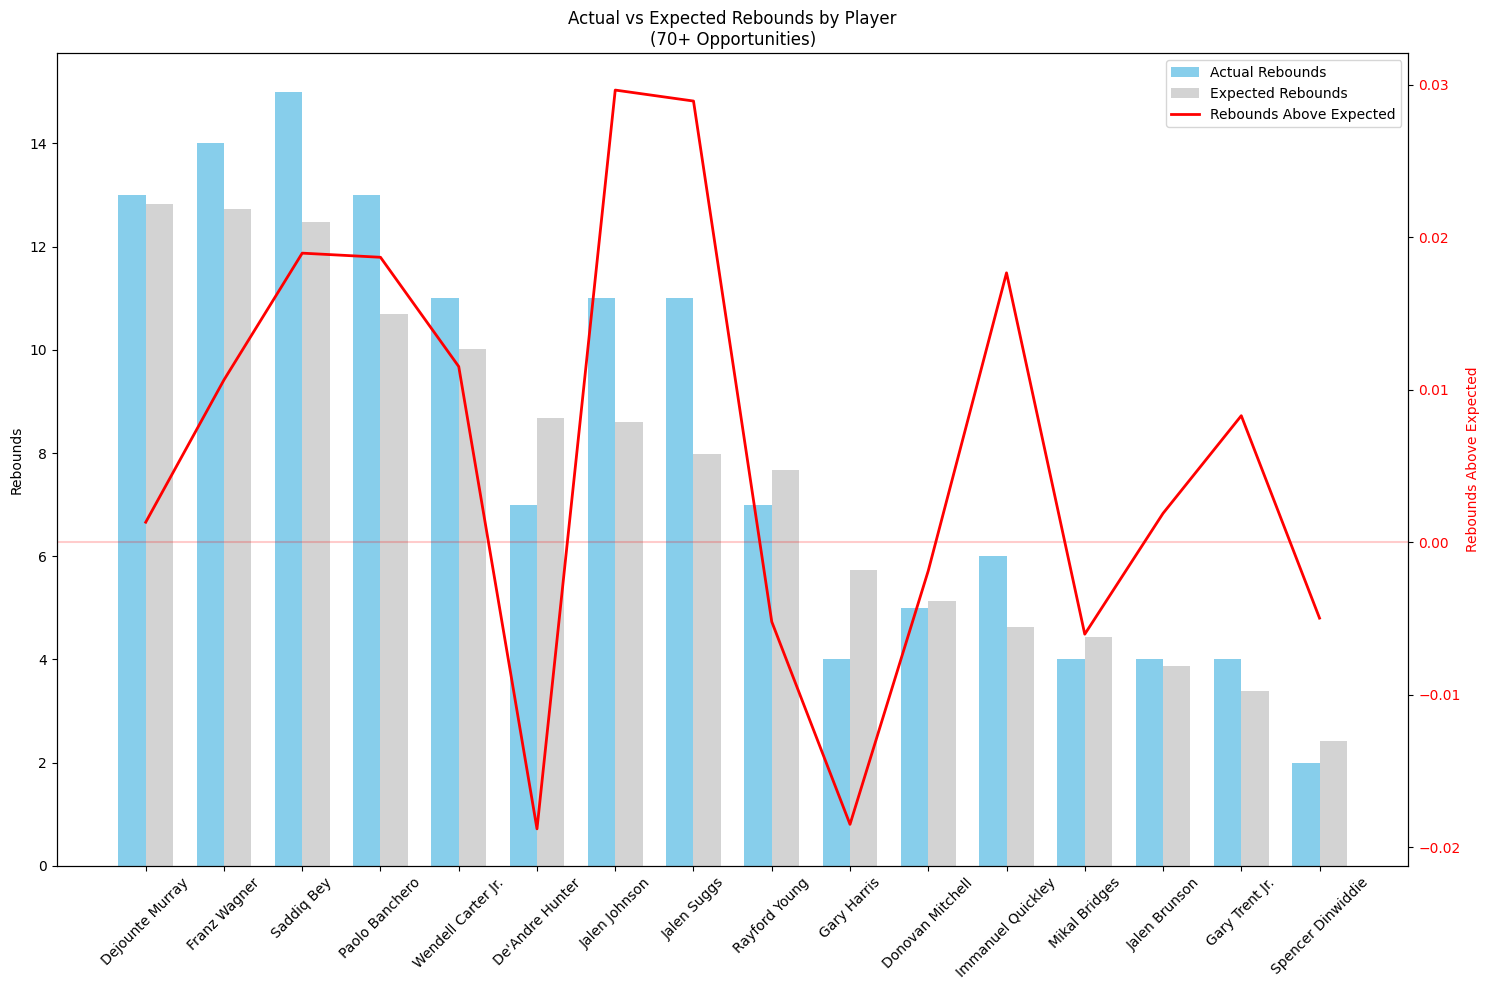

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv("./data/results/rebound_percentage_above_expected_stats.csv")

# Filter for 70+ opportunities and sort
df_filtered = df[df['total_opportunities'] >= 70]
df_filtered = df_filtered.sort_values('expected_rebounds', ascending=False)

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(15, 10))

# Set width of bars and positions
width = 0.35
x = range(len(df_filtered))

# Create bars on primary axis
ax1.bar([i - width/2 for i in x], df_filtered['actual_rebounds'], 
        width, label='Actual Rebounds', color='skyblue')
ax1.bar([i + width/2 for i in x], df_filtered['expected_rebounds'], 
        width, label='Expected Rebounds', color='lightgray')
ax1.set_ylabel('Rebounds')

# Customize x-axis with slanted labels
plt.xticks([i for i in x], 
           [f"{row['first_name']} {row['last_name']}" for _, row in df_filtered.iterrows()],
           rotation=45)  # Changed rotation to 45 and added horizontal alignment

# Create secondary axis for the difference line
ax2 = ax1.twinx()
ax2.plot(x, df_filtered['rebounds_above_expected'], 
         color='red', linewidth=2, label='Rebounds Above Expected')
ax2.set_ylabel('Rebounds Above Expected', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add horizontal line at y=0 for reference on secondary axis
ax2.axhline(y=0, color='red', linestyle='-', alpha=0.2)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title('Actual vs Expected Rebounds by Player\n(70+ Opportunities)')

plt.tight_layout()
plt.show()

/tmp/ipykernel_49813/3896933340.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['position_group'] = df_filtered['position'].apply(position_group)
/tmp/ipykernel_49813/3896933340.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['net_rebounds'] = df_filtered['actual_rebounds'] - df_filtered['expected_rebounds']


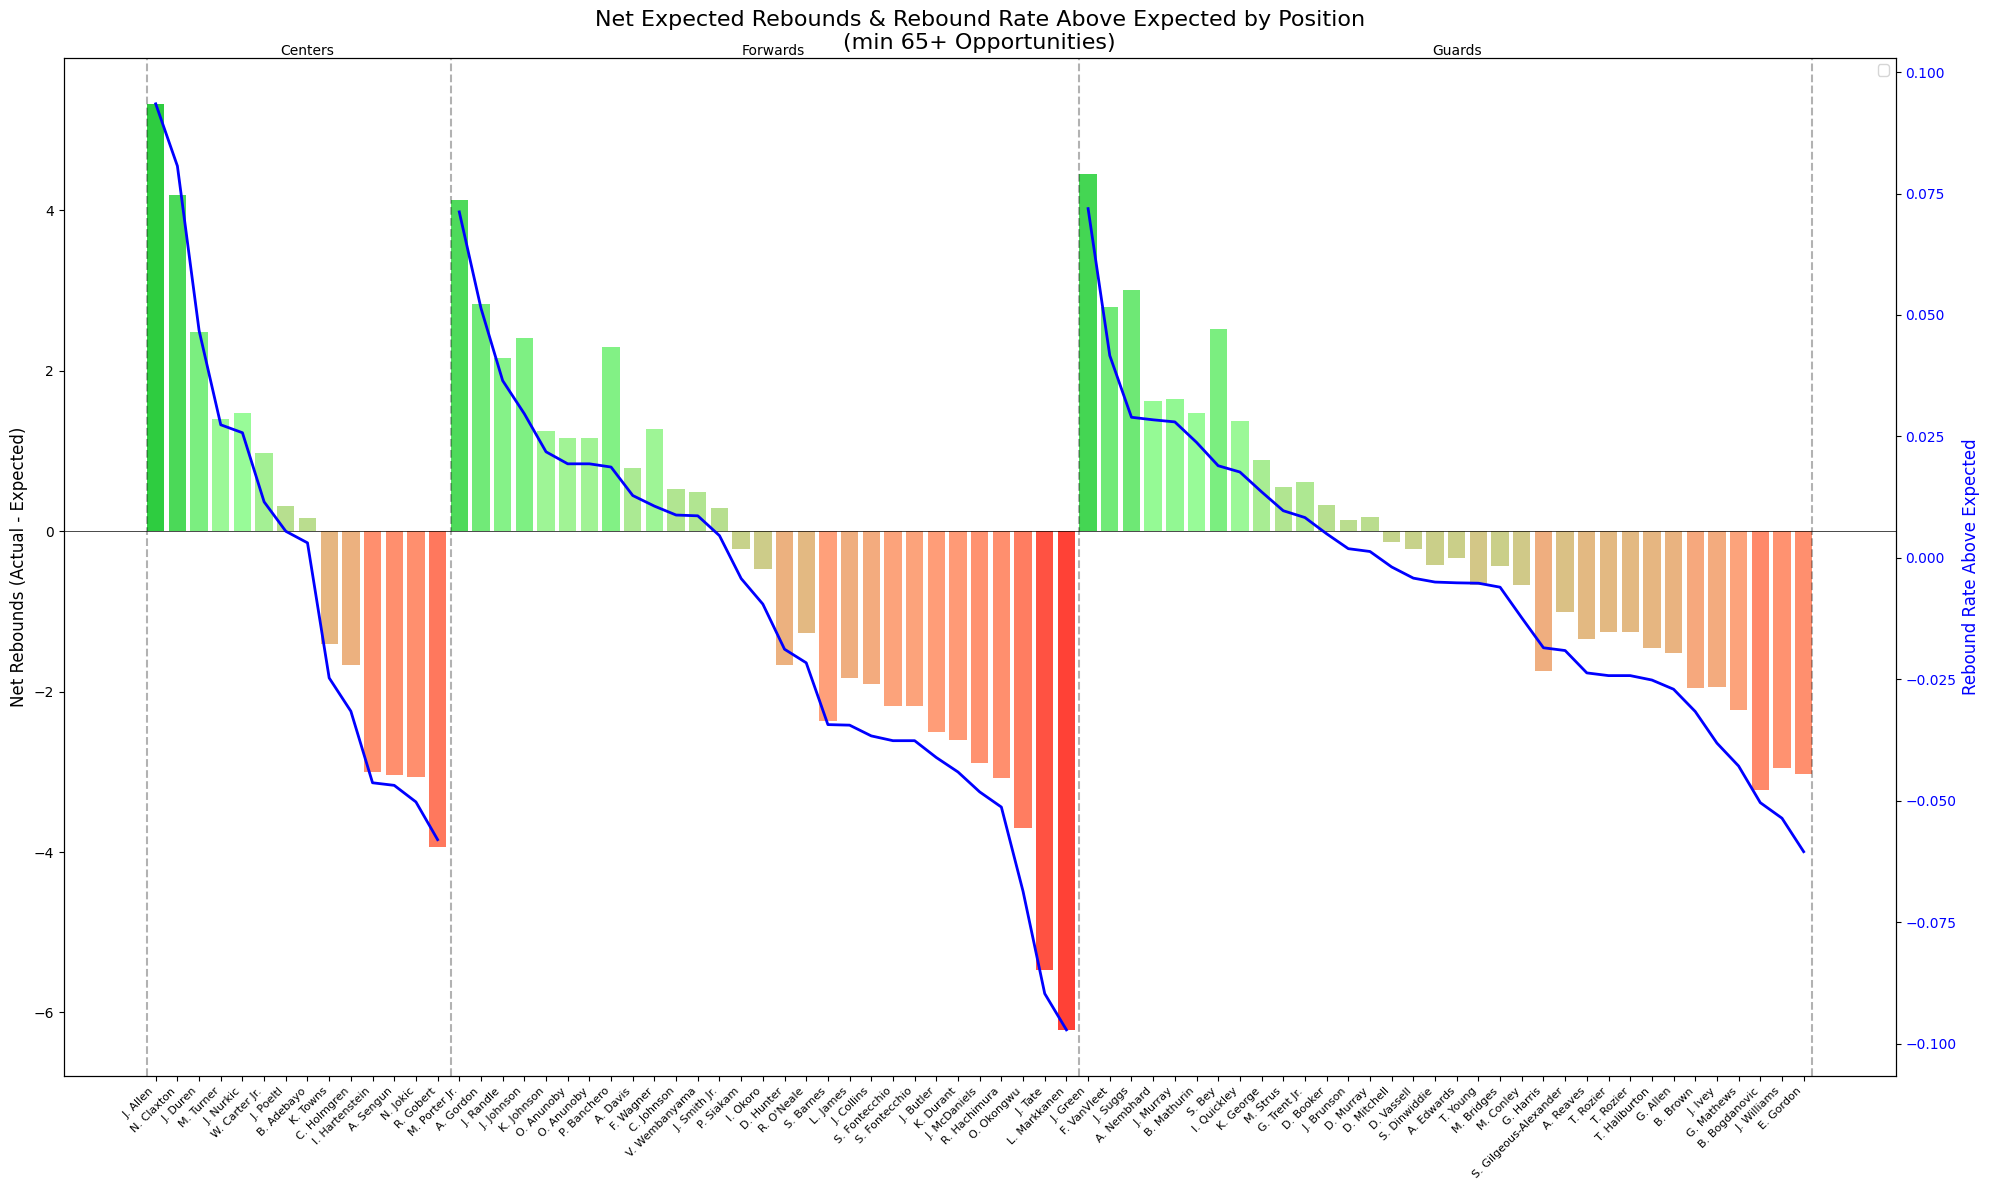

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Read and merge data
df = pd.read_csv("./data/results/rebound_percentage_above_expected_stats.csv")
player_data = pd.read_csv("./data/src/basic_player_info.csv", header=0)
df['player_id'] = df['player_id'].astype(int)
df = pd.merge(df, player_data[["person_id", "position"]], left_on="player_id", right_on="person_id", how="left")
df = df.drop(columns=["person_id_y"], axis=1)

# Create position groups
def position_group(pos):
    if pos in ['G', 'G-F']:
        return 'Guards'
    elif pos in ['F', 'F-C', 'F-G']:
        return 'Wings'
    elif pos in ['C', 'C-F']:
        return 'Bigs'
    else:
        return 'Other'

# Filter and prepare data
df_filtered = df[df['total_opportunities'] >= 50]
df_filtered['position_group'] = df_filtered['position'].apply(position_group)
df_filtered['net_rebounds'] = df_filtered['actual_rebounds'] - df_filtered['expected_rebounds']

# Sort within each position group by rebounds_above_expected
df_filtered = df_filtered.sort_values(['position_group', 'rebounds_above_expected'], ascending=[True, False])

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(20, 12))

# Set up colors
colors = ['#FF4136', '#FFA07A', '#98FB98', '#2ECC40']
n_bins = 100
cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)
norm = plt.Normalize(df_filtered['net_rebounds'].min(), df_filtered['net_rebounds'].max())

# Create bars with position group separation
x = np.arange(len(df_filtered))
bars = ax1.bar(x, df_filtered['net_rebounds'], width=0.8, 
               color=cmap(norm(df_filtered['net_rebounds'])))

# Add vertical lines to separate position groups
prev_group = None
for i, group in enumerate(df_filtered['position_group']):
    if group != prev_group:
        ax1.axvline(x=i-0.4, color='black', linestyle='--', alpha=0.3)
        # Add group label
        if prev_group is not None:
            ax1.text((i + last_i) / 2, ax1.get_ylim()[1], prev_group,
                    ha='center', va='bottom')
        last_i = i
    prev_group = group
    
# Add last group label
ax1.axvline(x=i+0.4, color='black', linestyle='--', alpha=0.3)
ax1.text((len(df_filtered) + last_i) / 2, ax1.get_ylim()[1], prev_group,
         ha='center', va='bottom')

# Customize axes
ax1.set_ylabel('Net Rebounds (Actual - Expected)', fontsize=12)
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.xlim()

# X-axis labels
plt.xticks(x, [f"{row['first_name'][0]}. {row['last_name']}" for _, row in df_filtered.iterrows()],
           rotation=45, ha='right', fontsize=8)

# Secondary axis for rebound rate - modified to break between groups
ax2 = ax1.twinx()

# Initialize variables for line segments
prev_group = None
line_x = []
line_y = []

# Plot separate line segments for each position group
for i, (_, row) in enumerate(df_filtered.iterrows()):
    if prev_group is None or row['position_group'] == prev_group:
        line_x.append(i)
        line_y.append(row['rebounds_above_expected'])
    else:
        # Plot the completed segment
        ax2.plot(line_x, line_y, color='blue', linewidth=2, label='Rebound Rate Above Expected' if i == 1 else "")
        # Start new segment
        line_x = [i]
        line_y = [row['rebounds_above_expected']]
    prev_group = row['position_group']

# Plot the final segment
if line_x:
    ax2.plot(line_x, line_y, color='blue', linewidth=2)

ax2.set_ylabel('Rebound Rate Above Expected', color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=10)

plt.title('Net Expected Rebounds & Rebound Rate Above Expected by Position\n(min 65+ Opportunities)', fontsize=16)
plt.tight_layout()
plt.show()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

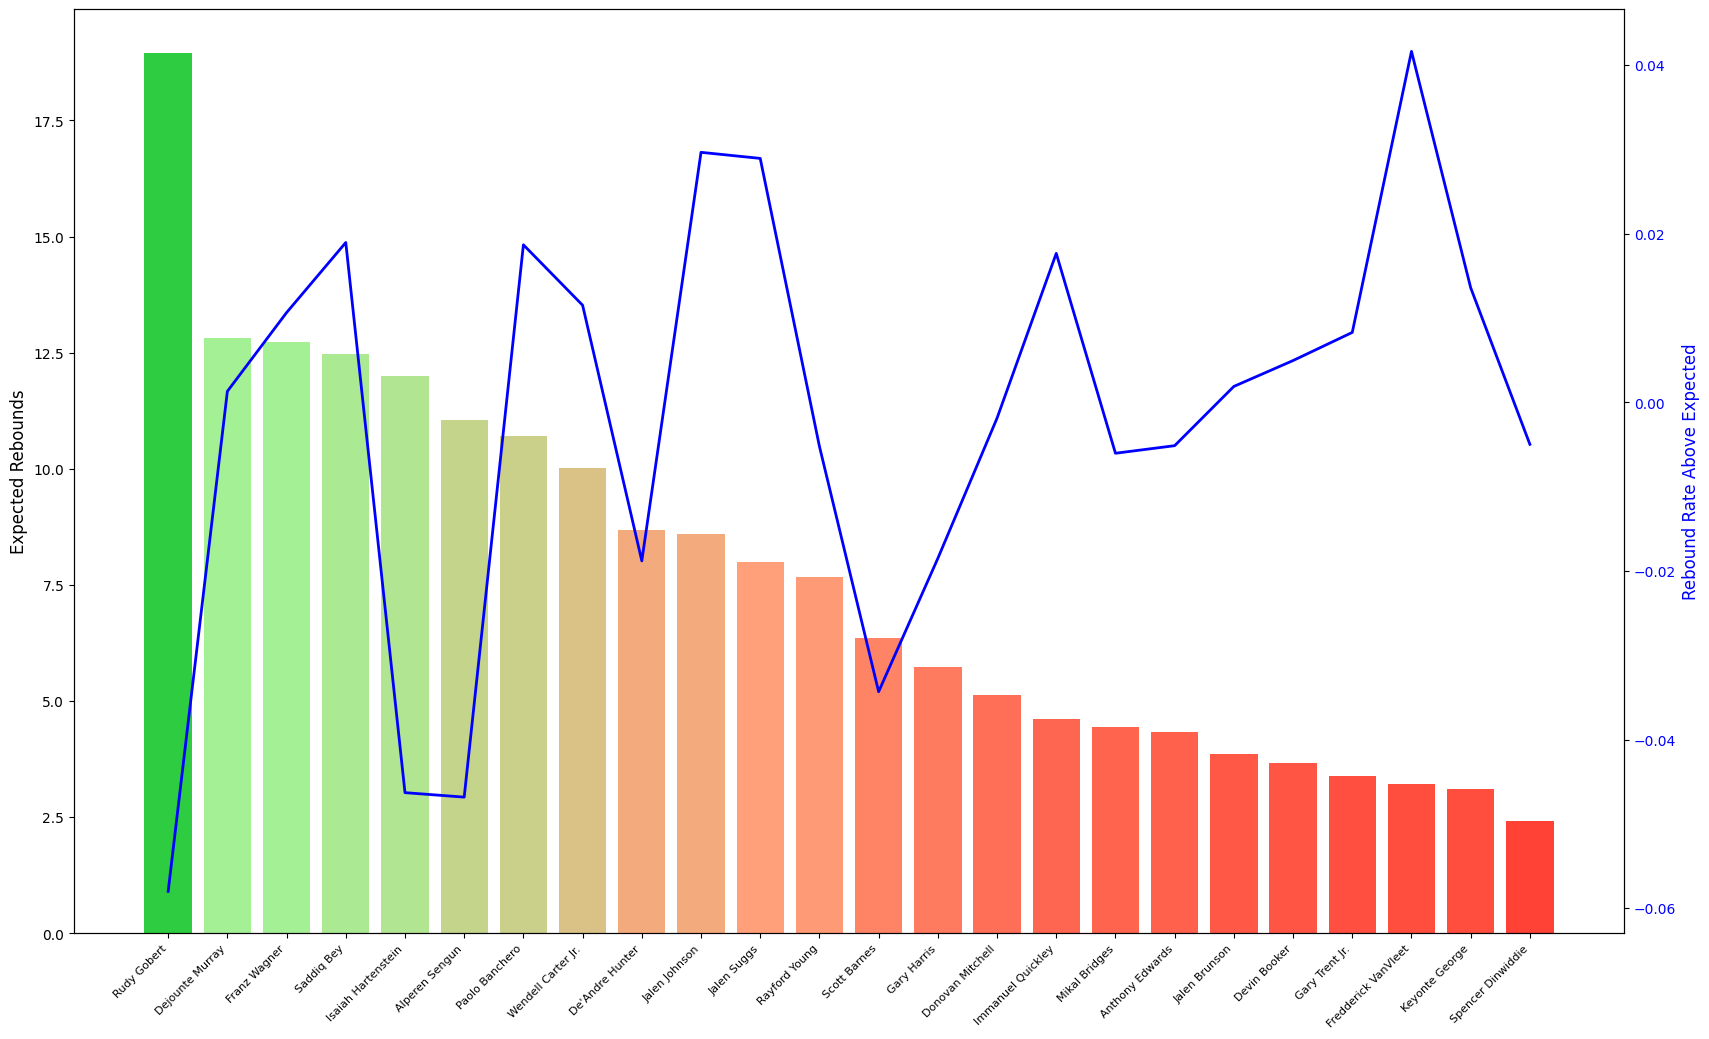

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Read the data
df = pd.read_csv("./data/results/rebound_percentage_above_expected_stats.csv")

# Filter for 65+ opportunities and sort by expected rebounds
df_filtered = df[df['total_opportunities'] >= 65]
df_filtered = df_filtered.sort_values('expected_rebounds', ascending=False)

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(20, 12))

# Set positions
x = range(len(df_filtered))

# Create custom colormap for expected rebounds
colors = ['#FF4136', '#FFA07A', '#98FB98', '#2ECC40']  # Red, Light Salmon, Pale Green, Green
n_bins = 100
cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

# Normalize color values based on expected rebounds
norm = plt.Normalize(df_filtered['expected_rebounds'].min(), df_filtered['expected_rebounds'].max())

# Create bars on primary axis with color gradient based on expected rebounds
bars = ax1.bar(x, df_filtered['expected_rebounds'], width=0.8, 
               color=cmap(norm(df_filtered['expected_rebounds'])))

ax1.set_ylabel('Expected Rebounds', fontsize=12)
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# Customize x-axis with angled labels
plt.xticks(x, [f"{row['first_name']} {row['last_name']}" for _, row in df_filtered.iterrows()],
           rotation=45, ha='right', fontsize=8)

# Create secondary axis for the rebound rate line
ax2 = ax1.twinx()
ax2.plot(x, df_filtered['rebounds_above_expected'], 
         color='blue', linewidth=2, label='Rebound Rate Above Expected')
ax2.set_ylabel('Rebound Rate Above Expected', color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')

# Add colorbar for expected rebounds
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Expected Rebounds', fontsize=12)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=10)

plt.title('Expected Rebounds and Rebound Rate Above Expected by Player\n(65+ Opportunities)', fontsize=16)
plt.tight_layout()
plt.show()